In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

### Рассмотрим данные

In [2]:
data = pd.read_csv("data/cars.csv")
data.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3751,Volkswagen Passat 2.0 TDI AT Highline,2012,900000,108000,Diesel,Dealer,Automatic,First Owner,17.42 kmpl,1968 CC,175 bhp,350Nm@ 1500-3500rpm,5.0
6058,Maruti Ciaz ZXi,2016,590000,40000,Petrol,Individual,Manual,Second Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
3875,Toyota Etios GD,2014,400000,120000,Diesel,Individual,Manual,Second Owner,23.59 kmpl,1364 CC,67.04 bhp,170Nm@ 1800-2400rpm,5.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [4]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [5]:
data.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
data.describe(include="object")

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


### Отчистка от нулевых значений

In [7]:
mileage_null_indexes = set(data[data.mileage.isnull()].index)
engine_null_indexes = set(data[data.engine.isnull()].index)
max_power_null_indexes = set(data[data.max_power.isnull()].index)
torque_null_indexes = set(data[data.torque.isnull()].index)
seats_null_indexes = set(data[data.seats.isnull()].index)

In [8]:
print(len(mileage_null_indexes - engine_null_indexes) / len(mileage_null_indexes))
print(len(mileage_null_indexes - max_power_null_indexes) / len(mileage_null_indexes))
print(len(mileage_null_indexes - torque_null_indexes) / len(mileage_null_indexes))
print(len(mileage_null_indexes - seats_null_indexes) / len(mileage_null_indexes))

0.0
0.0297029702970297
0.0
0.0


In [9]:
data = data.dropna(axis="index")

### Визуализация данных

Рассмотрим самые популярные и непопулярные модели машин среди предложенных

In [10]:
sns.set_style("whitegrid")

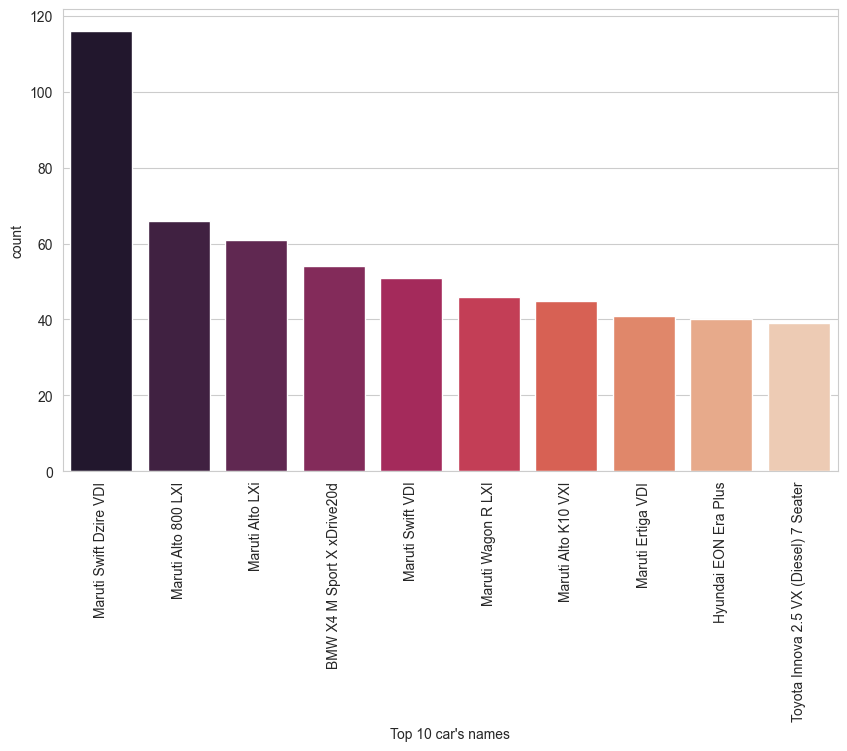

In [11]:
top_10_desire_cars = data["name"].value_counts(ascending=False)[:10]
top_10_desire_cars = top_10_desire_cars.to_frame().reset_index()

plt.figure(figsize=(10,6))

sns.barplot(data=top_10_desire_cars, x="name", y="count", palette="rocket")
plt.xlabel("Top 10 car's names")
plt.xticks(rotation=90)
plt.show()

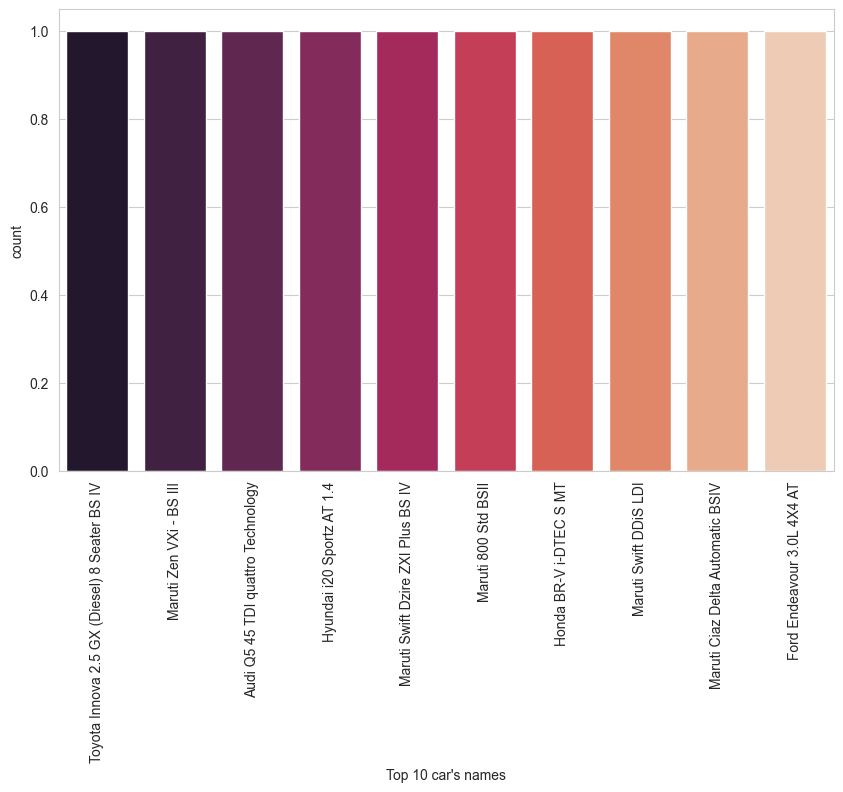

In [12]:
top_10_unpopular_cars = data["name"].value_counts(ascending=True)[:10]
top_10_unpopular_cars = top_10_unpopular_cars.to_frame().reset_index()

plt.figure(figsize=(10,6))

sns.barplot(data=top_10_unpopular_cars, x="name", y="count", palette="rocket")
plt.xlabel("Top 10 car's names")
plt.xticks(rotation=90)
plt.show()

Взглянем на распределение предложений о продажи по годам автомобилей

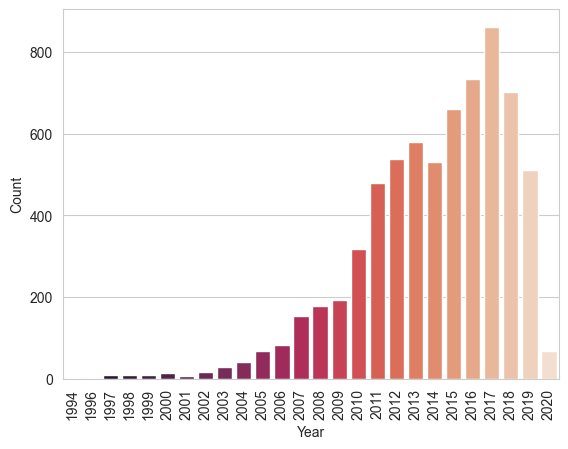

In [13]:
sns.countplot(data=data, x="year", palette="rocket")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Посмотрим на среднию цену за автомобиль в зав-ти от значений, предложенных признаков

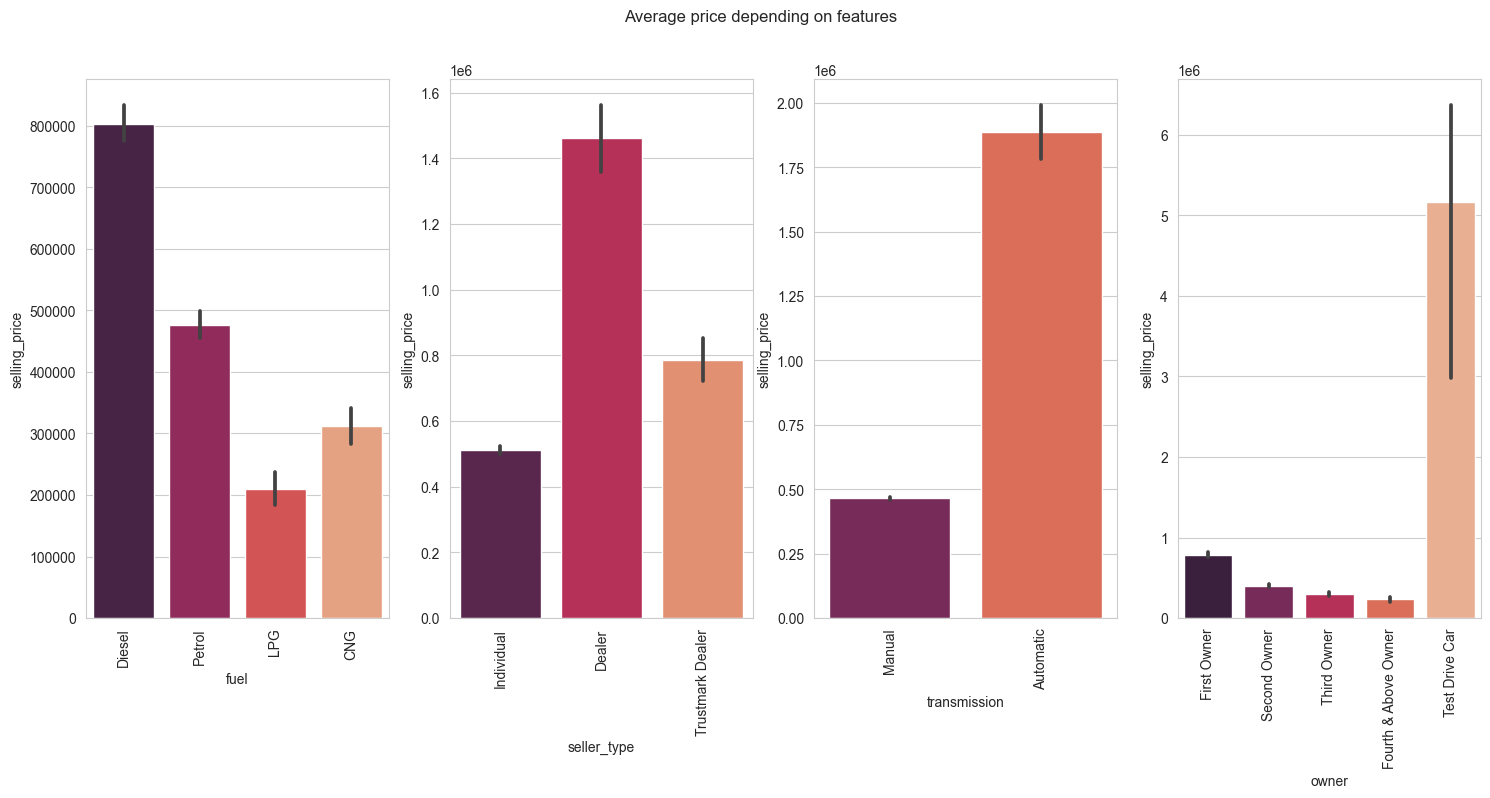

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(18, 7))
fig.suptitle("Average price depending on features")

# fuel	seller_type	transmission	owner	
list_of_features = ["fuel", "seller_type", "transmission", "owner"]

for index, feature in enumerate(list_of_features):
    sns.barplot(ax=axes[index], x=feature, y="selling_price", data=data, palette="rocket")
    axes[index].tick_params(axis='x', rotation=90)
plt.show()

### Выполним обработку столбцов

Поскольку столбец torque содержит уникальные значения, представленные в разных шкалах, его обработка возывает трудности, поэтому исключим его


In [15]:
data = data.drop(axis=1, labels="torque")

In [16]:
data.describe(include="object")

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power
count,6796,6796,6796,6796,6796,6796,6796,6796
unique,1852,4,3,2,5,386,120,314
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp
freq,116,3696,5640,5900,4518,197,885,330


In [17]:
data["mileage_1"] = data["mileage"].apply(lambda x: x.split()[0]).astype("float64")
data["engine_1"] = data["engine"].apply(lambda x: x.split()[0]).astype("float64")
data["max_power_1"] = data["max_power"].apply(lambda x: x.split()[0]).astype("float64")


In [18]:
data = data.drop(axis=1, labels=["mileage", "engine", "max_power"])

Проверим, есть ли линейная корреляция между числовыми признаками, а также между признаками и целевой переменной

In [19]:
numeric_features = list(data.dtypes[(data.dtypes == "float64") | (data.dtypes == "int64")].index)

<Axes: >

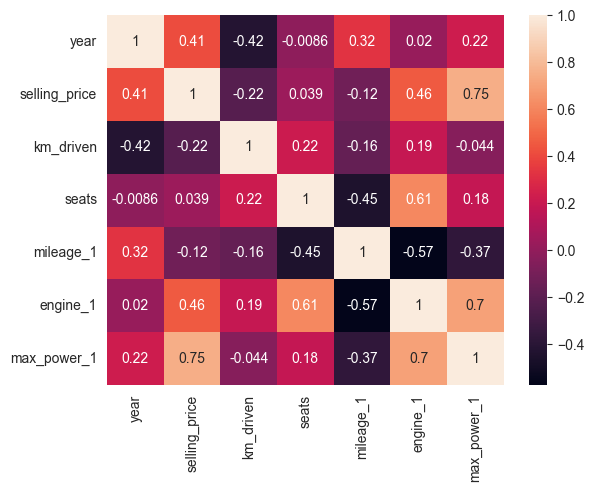

In [20]:
numeric_data_corr = data[numeric_features].corr()

sns.heatmap(numeric_data_corr, annot=True)

<Axes: >

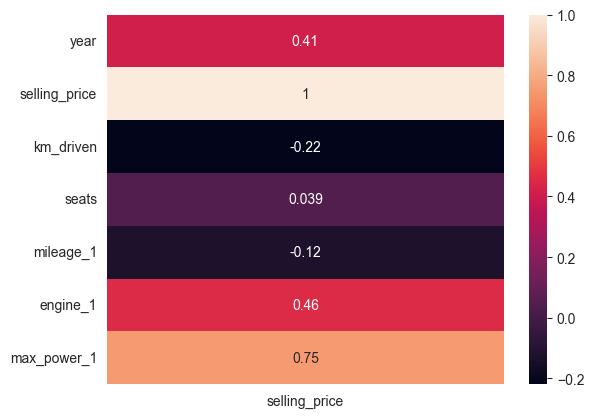

In [21]:
sns.heatmap(numeric_data_corr[["selling_price"]], annot=True)

### Построение модели

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import numpy as np

In [23]:
numeric_features.remove("selling_price")

In [24]:
X = data[numeric_features]
y = data["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123456789)

Создадим модель линейной регрессии

In [25]:
model = LinearRegression()

model.fit(X_train, y_train)
pred = model.predict(X_test)

In [26]:
print("Test RMSE = %.4f" % mean_squared_error(y_test, pred, squared=False))

Test RMSE = 513536.1514


Линейная регрессия с l2 регуляризацией

In [27]:
model = Ridge()

model.fit(X_train, y_train)
pred = model.predict(X_test)

In [28]:
print("Test RMSE = %.4f" % mean_squared_error(y_test, pred, squared=False))

Test RMSE = 513536.1964


Нормализуем количественные признаки

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Ridge()

model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

In [30]:
print("Test RMSE = %.4f" % mean_squared_error(y_test, pred, squared=False))

Test RMSE = 513542.9724


Рассмотрим ошибку при константном предсказании модели

In [31]:
const_pred = data["selling_price"].mean()

shape = (y_test.shape[0], 1)
y_pred_const = np.empty(shape, dtype=np.float64)
y_pred_const.fill(const_pred)


In [32]:
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_const, squared=False))

Test RMSE = 842288.0877


### Создадим модель, использовав все признаки

Создадим новый признак, на основе столбца year

In [33]:
data["age_less_10"] = data["year"] > 2004
data["age_less_10"] = data["age_less_10"].astype(dtype="int64")

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [35]:
X = data.drop(["selling_price", "name"], axis=1)

y = data["selling_price"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123456789)

In [37]:
categorical = ["fuel", "seller_type", "transmission", "owner", "seats", "age_less_10"]
numeric_features = ["year", "km_driven", "mileage_1", "engine_1", "max_power_1"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop="first", handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])



In [38]:
X_train_transformed = column_transformer.fit_transform(X_train)

X_test_transformed = column_transformer.transform(X_test)

In [39]:
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=lst)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=lst)

X_train_transformed.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,...,seats_8.0,seats_9.0,seats_10.0,seats_14.0,age_less_10_1,year,km_driven,mileage_1,engine_1,max_power_1
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.253580,1.314221,0.354533,-0.511262,-0.452899
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.766313,-0.977912,-1.431466,1.079694,2.373682
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.001394,-0.100074,-0.334282,2.121769,-0.785438
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.508553,0.013720,0.396354,0.009776,-0.730015
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.763526,2.939848,-1.628271,2.064097,0.295314


Создадим модель

In [40]:
model = Ridge()

model.fit(X_train_transformed, y_train)
pred = model.predict(X_test_transformed)

In [41]:
print("Test RMSE = %.4f" % mean_squared_error(y_test, pred, squared=False))

Test RMSE = 474566.2153


Подберем наилучшие гиперпараметры для модели

In [42]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [43]:
alphas = np.logspace(-2, 3, 30)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)

searcher.fit(X_train_transformed, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 0.3562


In [44]:
model = Ridge(best_alpha)

model.fit(X_train_transformed, y_train)
pred = model.predict(X_test_transformed)

In [45]:
print("Test RMSE = %.4f" % mean_squared_error(y_test, pred, squared=False))

Test RMSE = 474714.0145
